example notebook using my own statistics package


In [33]:
import polars as pl
import numpy as np
import kagglehub
from kagglehub import KaggleDatasetAdapter
from sklearn.preprocessing import StandardScaler
import pandas as pd 
import sys
import os
import matplotlib.pyplot as plt 
import matplotlib

from matplotlib import ticker

# additional code before plt.show()
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)
# retrieve data

import os 
# Load the latest version
path = kagglehub.dataset_download("nehalbirla/vehicle-dataset-from-cardekho")

csv_path = os.path.join(path, "CAR DETAILS FROM CAR DEKHO.csv")  # replace with actual filename
df = pl.read_csv(csv_path)
df = df.to_pandas()  # Convert Polars DataFrame to Pandas DataFrame


some exploratory data analysis

In [34]:
df.head()
# columns: year, selling_price, km_driven, fuel, seller_type, transmission, owner
# numeric and categorical features
# I want to predict the selling price based on the features in the dataset, using linear regression.

df.shape

# 4340 rows and 8 columns 

(4340, 8)

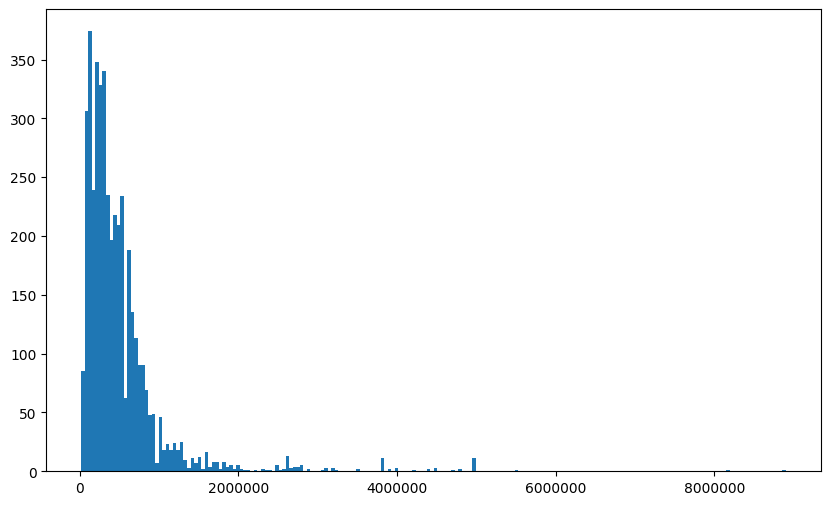

In [ ]:
# how does the price column look like?
plt.figure(figsize=(10,6))
plt.hist(df['selling_price'], bins=200)
ax = plt.gca()  # Get current Axes
ax.yaxis.set_major_formatter(formatter)
ax.ticklabel_format(style='plain', axis='x') # it kept on showing scientific notation 


plt.show()

# variable that I aim to predict is very skewed to the right. There are also some outliers. 
# consider log normal distribution for the target variable

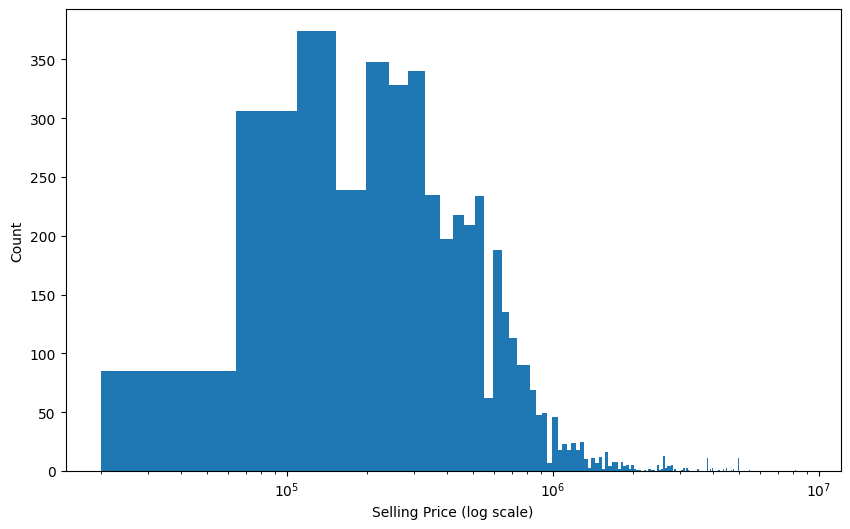

In [40]:
plt.figure(figsize=(10,6))
plt.hist(df['selling_price'], bins=200)
plt.xscale('log')
plt.xlabel("Selling Price (log scale)")
plt.ylabel("Count")
plt.show()


In [3]:
import importlib
import regression_analysis.models.ols  # Load the module object (needed before reload)
from regression_analysis.utils.diagnostics import check_multicollinearity_in_regressors
importlib.reload(regression_analysis.models.ols)  # Now you can reload it


from regression_analysis.models.ols import OLSRegression
from regression_analysis.utils.diagnostics import check_if_matrix_is_invertible


#Prepare the data
X = df.drop(columns=["name", "selling_price"])
y = df["selling_price"].values
y = y.astype(float).reshape(-1, 1)  # Now y is (4340, 1)
X = pd.get_dummies(X, drop_first=True).values.astype(float)  # get np.array
model = OLSRegression().fit_and_diagnostics(X, y)




⚠️ High VIF detected for the following features:
 x_2 with VIF = 27.78
 x_5 with VIF = 27.81
Dropped columns: [2, 5]


VIF for x_i: 1.2703919353499433
now prints all the vifs


In [ ]:
print(f"Model r-squared: {model.r_squared_}")
# Model r-squared: 0.4187324023560647


